In [1]:
# install the package for google colab 
!pip install pylca 

In [2]:
"""
LCA, demonstrate the effect of competition
"""
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylca import LCA

sns.set(style='white', palette='colorblind', context='talk')
np.random.seed(0)
%matplotlib inline 

In [3]:
"""model params
"""
n_units = 3
# input weights
w_input = 1
# decision param
leak = .5
competition = 1
self_excit = 0
# time step size
dt = .1
#
self_excit = 0
w_cross = 0
offset = 0
noise_sd = .1

# init LCA
lca = LCA(
    n_units, dt, leak, competition,
    self_excit=self_excit, w_input=w_input, w_cross=w_cross,
    offset=offset, noise_sd=noise_sd,
)

"""run LCA
"""
# make inputs: turning on more and more units
T = 25
input_patterns = list(np.tril(np.ones((n_units, n_units)), k=0))
# run LCA for all input patterns
vals = []
for input_pattern in input_patterns:
    input_seq = np.tile(input_pattern, (T, 1))
    vals.append(lca.run(input_seq))

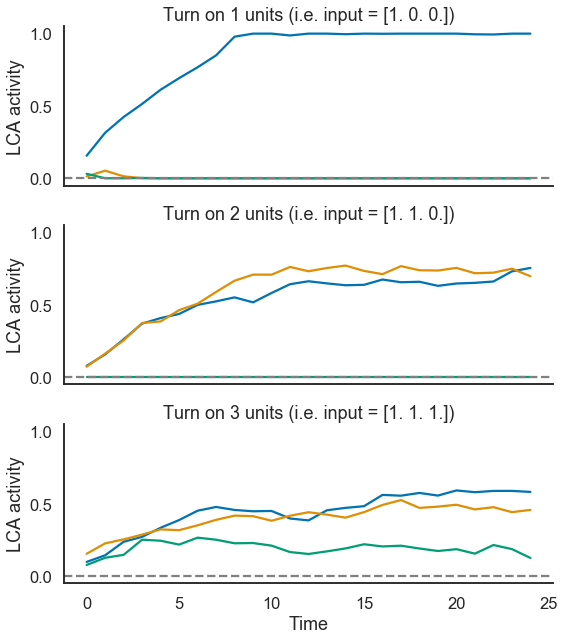

In [4]:
"""plot
if more units are activated, they compete and inhibit each other,
as a result, the uncertainty of the system is larger
"""

title_list = ['Turn on %d units' % (k+1) for k in range(n_units)]

f, axes = plt.subplots(n_units, 1, figsize=(8, 3*n_units), sharex=True)
for i, ax in enumerate(axes):
    ax.plot(vals[i])
    ax.set_title(f'{title_list[i]} (i.e. input = {input_patterns[i]})')
    ax.set_ylabel('LCA activity')
    ax.set_ylim([-.05, 1.05])
    ax.axhline(0, linestyle='--', color='grey')
axes[-1].set_xlabel('Time')
f.tight_layout()
sns.despine()

In [5]:
""" run a larger simulation
plot the max activity as a function of the number of units get activated
"""
# use more units, zero noise to clean the pattern
n_units = 7
noise_sd = 0
# init LCA
lca = LCA(
    n_units, dt, leak, competition,
    self_excit=self_excit, w_input=w_input, w_cross=w_cross,
    offset=offset, noise_sd=noise_sd,
)

"""run LCA
"""
# make inputs: turning on more and more units
input_patterns = list(np.tril(np.ones((n_units, n_units)), k=0))
# run LCA for all input patterns
vals = []
for input_pattern in input_patterns:
    input_seq = np.tile(input_pattern, (T, 1))
    vals.append(lca.run(input_seq))

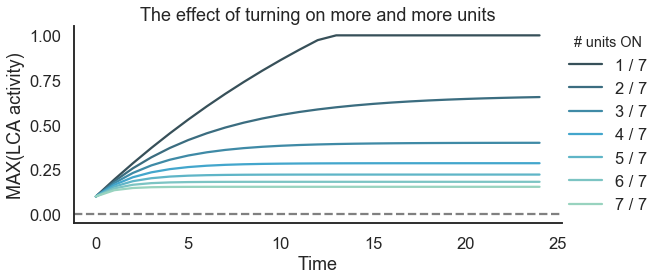

In [6]:
"""plot
again, if more units are activated, they compete and inhibit each other,
as a result, the uncertainty of the system is larger
"""
f, ax = plt.subplots(1, 1, figsize=(8, 4), sharex=True)
col_pal = sns.color_palette('GnBu_d', n_colors=n_units)
for i in range(n_units):
    ax.plot(np.max(vals[i], axis=1), color=col_pal[i])
ax.axhline(0, linestyle='--', color='grey')
ax.set_title(f'The effect of turning on more and more units')
ax.set_xlabel('Time')
ax.set_ylabel('MAX(LCA activity)')
ax.set_ylim([-.05, 1.05])
legend_list = [f'%d / {n_units}' % (k+1) for k in range(n_units)]
leg = f.legend(legend_list, frameon=False, bbox_to_anchor=(1.15, .9))
leg.set_title('# units ON', prop = {'size':'x-large'})
f.tight_layout()
sns.despine()